In [18]:
library(tidyverse)
library(tidymodels)

# 1. Data Description 

In [19]:
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

## Players dataset 
- The Players dataset contains information about individual players on a Minecraft server. 
- Each row corresponds to its own observation and a unique player. 
- Variables include
- experience level, whether they are a pro, amateur, or veteran
- subscription status, true or false 
- hashed email, to identify each player 
- number of hours played, 
- name 
- gender 
- age
- There are 196 players and 7 variables.

For the numeric variables, the mean for hours played is 5.85 hours. The mean age is 21 years. 
The rest are categorical variables, meaning we cannot find a mean for them.
The Age variable is missing 2 values, which could impact the mean. 

In [21]:
sessions <- read_csv("sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

Sessions Dataset
The sessions dataset contains information about individual gaming sessions for each player on the Minecraft server. 
There are 1535 sessions and 5 variables, where each row corresponds to one session. 
The variables are the following: 
 - hashed email, which identifies the player 
 - start time, when the session started 
 - end time, when the session ended 
 - original start time, the start time in milliseconds 
 - original end time, the end time in milliseconds 

- The mean for the original start time is 1.719e+12, and the mean for the original end time is 1.719e+12. 
- Those are numerical variables, so we can calculate the mean 


## 2. Questions 

The broad question I will be addressing is: 
Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

- The specific question I have formulated for this is "Can the subscription status predict the number of hours they play in the players dataset?"
- The players dataset will help address this question because it contains information about each player's subscription status (TRUE/FALSE), and the number of hours they have played (played_hours). 
- The players' subscription status is a categorical variable, and the number of hours played is a numerical variable. 
- These two variables are the ones needed to explore whether subscription status can predict the hours played. 
- The subscription status could tell us whether having a subscription will lead to more hours played or if it does not affect it much.

## 3. Exploratory Data Analysis and Visualization

Both players.csv and sessions.csv are already tidy, so additional wrngling is not nesssecary. 

The mean values in table format:

Players.csv
| Variable     | Mean |
|--------------|------|
| played_hours | 5.85 |
| Age          | 21.14|

Sessions:
| Variable            | Mean      |
|---------------------|-----------|
| original_start_time | 1.719e+12 |
| original_end_time   | 1.719e+12 |

Visualizations

Players.csv

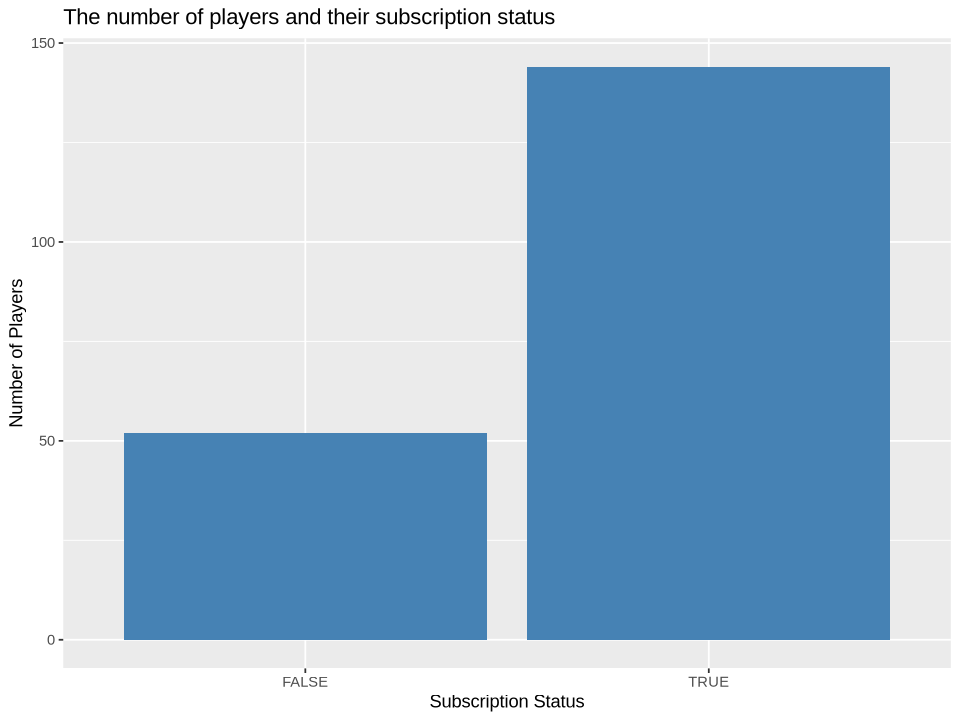

In [31]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(players, aes(x= subscribe))+
    geom_bar(fill = "steelblue")+
    labs(title = "The number of players and their subscription status", x = "Subscription Status", y = "Number of Players")


This visualization shows me that the number of people not subscribed is much more than those who are subscribed. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


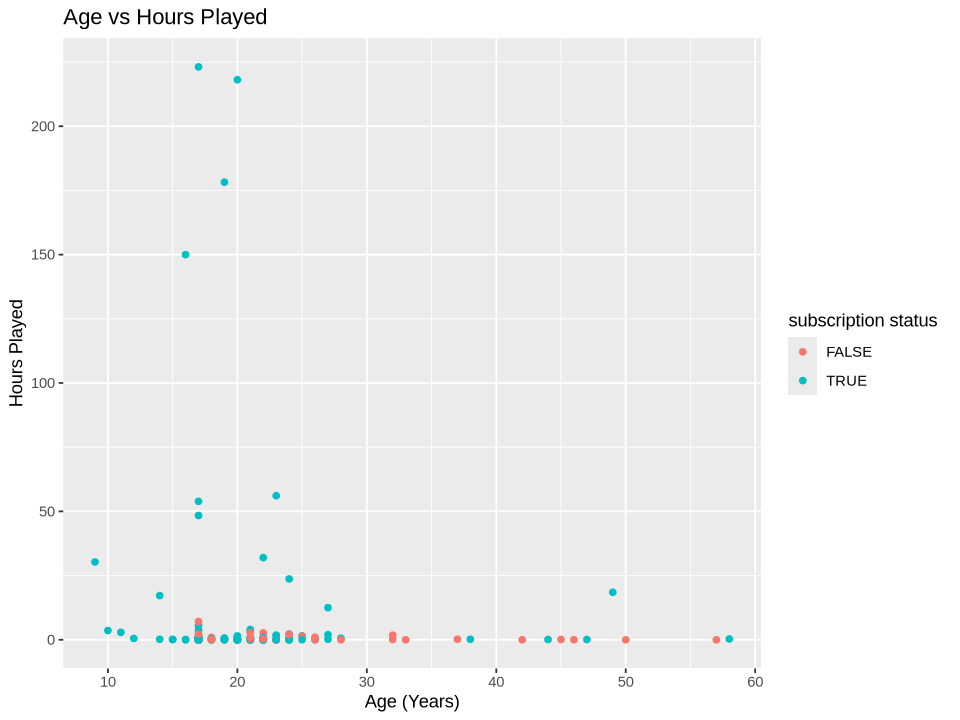

In [32]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(players, aes(x = Age, y = played_hours, color = subscribe))+
    geom_point()+
    labs(title = "Age vs Hours Played", x= "Age (Years)", y = "Hours Played", color = "subscription status")

Although the pattern is not very strong, we can see that generally, younger people play more compared to those who are older. However, we also have to note that there are more younger players compared to those older. 